In [1]:
#Attempting to optimize previous learning model

# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Data/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [5]:
application_df.columns

Index(['EIN', 'NAME', 'APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION',
       'USE_CASE', 'ORGANIZATION', 'STATUS', 'INCOME_AMT',
       'SPECIAL_CONSIDERATIONS', 'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')

In [6]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'. Adding USE_CASE,and APPLICATION_TYPE to see if it helps optimization
applicaton_df = application_df.drop(['EIN','NAME','USE_CASE','APPLICATION_TYPE'], axis=1, inplace = True)

In [7]:
#check for dropped columns
application_df.head()

,AFFILIATION,CLASSIFICATION,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,Independent,C1000,Association,1,0,N,5000,1
1,Independent,C2000,Co-operative,1,1-9999,N,108590,1
2,CompanySponsored,C3000,Association,1,0,N,5000,0
3,CompanySponsored,C2000,Trust,1,10000-24999,N,6692,1
4,Independent,C1000,Trust,1,100000-499999,N,142590,1


In [8]:
# Determine the number of unique values in each column.
application_df.nunique()

AFFILIATION                  6
CLASSIFICATION              71
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [13]:
# Look at CLASSIFICATION value counts for binning
classification_value_counts = application_df['CLASSIFICATION'].value_counts()

classification_value_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

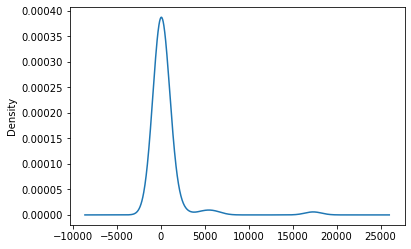

In [14]:
# Visualize the value counts of CLASSIFICATION
classification_value_counts.plot.density()

In [15]:
# Determine which values to replace if counts are less than ..?
replace_class = list(application_value_counts[application_value_counts < 500].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [16]:
# Generate our categorical variable lists
catagorical_variables = application_df.dtypes[application_df.dtypes == 'object'].index.tolist()
catagorical_variables

['AFFILIATION',
 'CLASSIFICATION',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [17]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[catagorical_variables]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(catagorical_variables)
encode_df.head()

C:\Users\sound\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C0,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C1230,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [18]:
# Merge one-hot encoded features and drop the originals
application_merge_df = application_df.merge(encode_df,left_index=True,right_index=True).drop(catagorical_variables,axis=1)
application_merge_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C0,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [20]:
# Split our preprocessed data into our features and target arrays
y = application_merge_df['IS_SUCCESSFUL']
X = application_merge_df.drop(['IS_SUCCESSFUL'],axis=1)
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [21]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [22]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
hidden_nodes_layer1 = 10
hidden_nodes_layer2 = 5
input_features = len(X_train_scaled[0])
output = 1


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim = input_features, activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='sigmoid'))

# Output layer
nn.add(tf.keras.layers.Dense(units=output, activation='relu'))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                950       
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 1,011
Trainable params: 1,011
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [24]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 810us/step - loss: 0.6993 - accuracy: 0.5325
Epoch 2/100
804/804 [==============================] - 1s 783us/step - loss: 0.6916 - accuracy: 0.5325
Epoch 3/100
804/804 [==============================] - 1s 801us/step - loss: 0.6913 - accuracy: 0.5325
Epoch 4/100
804/804 [==============================] - 1s 785us/step - loss: 0.6915 - accuracy: 0.5325
Epoch 5/100
804/804 [==============================] - 1s 779us/step - loss: 0.6915 - accuracy: 0.5313
Epoch 6/100
804/804 [==============================] - 1s 778us/step - loss: 0.6915 - accuracy: 0.5296
Epoch 7/100
804/804 [==============================] - 1s 780us/step - loss: 0.6914 - accuracy: 0.5318
Epoch 8/100
804/804 [==============================] - 1s 830us/step - loss: 0.6914 - accuracy: 0.5300
Epoch 9/100
804/804 [==============================] - 1s 817us/step - loss: 0.6916 - accuracy: 0.5309
Epoch 10/100
804/804 [==============================] - 1s 810us/step - l

804/804 [==============================] - 1s 770us/step - loss: 0.6915 - accuracy: 0.5325
Epoch 80/100
804/804 [==============================] - 1s 771us/step - loss: 0.6917 - accuracy: 0.5302
Epoch 81/100
804/804 [==============================] - 1s 776us/step - loss: 0.6915 - accuracy: 0.5325
Epoch 82/100
804/804 [==============================] - 1s 787us/step - loss: 0.6915 - accuracy: 0.5325
Epoch 83/100
804/804 [==============================] - 1s 818us/step - loss: 0.6918 - accuracy: 0.5325
Epoch 84/100
804/804 [==============================] - 1s 816us/step - loss: 0.6915 - accuracy: 0.5325
Epoch 85/100
804/804 [==============================] - 1s 792us/step - loss: 0.6915 - accuracy: 0.5325
Epoch 86/100
804/804 [==============================] - 1s 775us/step - loss: 0.6915 - accuracy: 0.5305
Epoch 87/100
804/804 [==============================] - 1s 771us/step - loss: 0.6914 - accuracy: 0.5314
Epoch 88/100
804/804 [==============================] - 1s 796us/step - loss:

In [25]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"ATTEMPT 1: \n Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 6.7776 - accuracy: 0.4736 - 289ms/epoch - 1ms/step
ATTEMPT 1: 
 Loss: 6.777614593505859, Accuracy: 0.47358599305152893


In [26]:
#ATTEMPT 2 - changing activation functions on the model

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
hidden_nodes_layer1 = 10
hidden_nodes_layer2 = 5
input_features = len(X_train_scaled[0])
output = 1


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim = input_features, activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=output, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                950       
                                                                 
 dense_4 (Dense)             (None, 5)                 55        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 1,011
Trainable params: 1,011
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [28]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 775us/step - loss: 32.7038 - accuracy: 0.5218
Epoch 2/100
804/804 [==============================] - 1s 801us/step - loss: 0.6911 - accuracy: 0.5325
Epoch 3/100
804/804 [==============================] - 1s 847us/step - loss: 0.6911 - accuracy: 0.5325
Epoch 4/100
804/804 [==============================] - 1s 786us/step - loss: 0.6911 - accuracy: 0.5325
Epoch 5/100
804/804 [==============================] - 1s 780us/step - loss: 0.6911 - accuracy: 0.5325
Epoch 6/100
804/804 [==============================] - 1s 791us/step - loss: 0.6911 - accuracy: 0.5325
Epoch 7/100
804/804 [==============================] - 1s 769us/step - loss: 0.6911 - accuracy: 0.5325
Epoch 8/100
804/804 [==============================] - 1s 775us/step - loss: 0.6911 - accuracy: 0.5325
Epoch 9/100
804/804 [==============================] - 1s 792us/step - loss: 0.6911 - accuracy: 0.5325
Epoch 10/100
804/804 [==============================] - 1s 778us/step - 

804/804 [==============================] - 1s 791us/step - loss: 0.6911 - accuracy: 0.5325
Epoch 80/100
804/804 [==============================] - 1s 801us/step - loss: 0.6911 - accuracy: 0.5325
Epoch 81/100
804/804 [==============================] - 1s 775us/step - loss: 0.6911 - accuracy: 0.5325
Epoch 82/100
804/804 [==============================] - 1s 765us/step - loss: 0.6911 - accuracy: 0.5325
Epoch 83/100
804/804 [==============================] - 1s 765us/step - loss: 0.6911 - accuracy: 0.5325
Epoch 84/100
804/804 [==============================] - 1s 768us/step - loss: 0.6911 - accuracy: 0.5325
Epoch 85/100
804/804 [==============================] - 1s 773us/step - loss: 0.6911 - accuracy: 0.5325
Epoch 86/100
804/804 [==============================] - 1s 769us/step - loss: 0.6911 - accuracy: 0.5325
Epoch 87/100
804/804 [==============================] - 1s 765us/step - loss: 0.6911 - accuracy: 0.5325
Epoch 88/100
804/804 [==============================] - 1s 765us/step - loss:

In [29]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"ATTEMPT 2: \n Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6934 - accuracy: 0.5614 - 260ms/epoch - 969us/step
ATTEMPT 2: 
 Loss: 0.6933780908584595, Accuracy: 0.5613994002342224


In [34]:
#ATTEMPT 3 - adding a 3rd layer to the model- keeping the same activation functions due to a bit more success 
#in the previous attempt

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
hidden_nodes_layer1 = 15
hidden_nodes_layer2 = 10
hidden_nodes_layer3 = 5

input_features = len(X_train_scaled[0])
output = 1


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim = input_features, activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation='relu'))


# Output layer
nn.add(tf.keras.layers.Dense(units=output, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 15)                1425      
                                                                 
 dense_11 (Dense)            (None, 10)                160       
                                                                 
 dense_12 (Dense)            (None, 5)                 55        
                                                                 
 dense_13 (Dense)            (None, 1)                 6         
                                                                 
Total params: 1,646
Trainable params: 1,646
Non-trainable params: 0
_________________________________________________________________


In [35]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [36]:
# Training the model with more epochs
fit_model = nn.fit(X_train,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 790us/step - loss: 11520.4639 - accuracy: 0.4980
Epoch 2/100
804/804 [==============================] - 1s 784us/step - loss: 10561.8350 - accuracy: 0.4940
Epoch 3/100
804/804 [==============================] - 1s 783us/step - loss: 30865.4434 - accuracy: 0.4928
Epoch 4/100
804/804 [==============================] - 1s 785us/step - loss: 9381.7842 - accuracy: 0.4995
Epoch 5/100
804/804 [==============================] - 1s 789us/step - loss: 17729.5898 - accuracy: 0.4898
Epoch 6/100
804/804 [==============================] - 1s 821us/step - loss: 11564.4277 - accuracy: 0.5061
Epoch 7/100
804/804 [==============================] - 1s 833us/step - loss: 11313.9795 - accuracy: 0.5105
Epoch 8/100
804/804 [==============================] - 1s 820us/step - loss: 1075.6913 - accuracy: 0.5313
Epoch 9/100
804/804 [==============================] - 1s 784us/step - loss: 5577.7417 - accuracy: 0.5080
Epoch 10/100
804/804 [==================

804/804 [==============================] - 1s 791us/step - loss: 0.6911 - accuracy: 0.5325
Epoch 80/100
804/804 [==============================] - 1s 812us/step - loss: 0.6911 - accuracy: 0.5325
Epoch 81/100
804/804 [==============================] - 1s 853us/step - loss: 0.6911 - accuracy: 0.5325
Epoch 82/100
804/804 [==============================] - 1s 831us/step - loss: 0.6911 - accuracy: 0.5325
Epoch 83/100
804/804 [==============================] - 1s 802us/step - loss: 0.6911 - accuracy: 0.5325
Epoch 84/100
804/804 [==============================] - 1s 788us/step - loss: 0.6911 - accuracy: 0.5325
Epoch 85/100
804/804 [==============================] - 1s 789us/step - loss: 0.6911 - accuracy: 0.5325
Epoch 86/100
804/804 [==============================] - 1s 786us/step - loss: 0.6911 - accuracy: 0.5325
Epoch 87/100
804/804 [==============================] - 1s 785us/step - loss: 0.6911 - accuracy: 0.5325
Epoch 88/100
804/804 [==============================] - 1s 795us/step - loss:

In [37]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"ATTEMPT 3: \n Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.7312 - accuracy: 0.4220 - 272ms/epoch - 1ms/step
ATTEMPT 3: 
 Loss: 0.7311568260192871, Accuracy: 0.42204082012176514


In [38]:
#ATTEMPT 4 - removing a 3rd layer to the model- changing activation functions 

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
hidden_nodes_layer1 = 20
hidden_nodes_layer2 = 10
#hidden_nodes_layer3 = 5

input_features = len(X_train_scaled[0])
output = 1


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim = input_features, activation='gelu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='gelu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=output, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 20)                1900      
                                                                 
 dense_15 (Dense)            (None, 10)                210       
                                                                 
 dense_16 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2,121
Trainable params: 2,121
Non-trainable params: 0
_________________________________________________________________


In [39]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [40]:
# Training the model with more epochs
fit_model = nn.fit(X_train,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 2s 905us/step - loss: 14740.4932 - accuracy: 0.4904
Epoch 2/100
804/804 [==============================] - 1s 889us/step - loss: 915.0124 - accuracy: 0.4944
Epoch 3/100
804/804 [==============================] - 1s 897us/step - loss: 24.4865 - accuracy: 0.5325
Epoch 4/100
804/804 [==============================] - 1s 949us/step - loss: 0.6886 - accuracy: 0.5325
Epoch 5/100
804/804 [==============================] - 1s 929us/step - loss: 0.6852 - accuracy: 0.5325
Epoch 6/100
804/804 [==============================] - 1s 849us/step - loss: 0.6842 - accuracy: 0.5325
Epoch 7/100
804/804 [==============================] - 1s 853us/step - loss: 0.6837 - accuracy: 0.5325
Epoch 8/100
804/804 [==============================] - 1s 855us/step - loss: 0.6836 - accuracy: 0.5325
Epoch 9/100
804/804 [==============================] - 1s 846us/step - loss: 0.6835 - accuracy: 0.5325
Epoch 10/100
804/804 [==============================] - 1s 916us/s

804/804 [==============================] - 1s 876us/step - loss: 0.6911 - accuracy: 0.5325
Epoch 80/100
804/804 [==============================] - 1s 857us/step - loss: 0.6911 - accuracy: 0.5325
Epoch 81/100
804/804 [==============================] - 1s 857us/step - loss: 0.6911 - accuracy: 0.5325
Epoch 82/100
804/804 [==============================] - 1s 900us/step - loss: 0.6911 - accuracy: 0.5325
Epoch 83/100
804/804 [==============================] - 1s 883us/step - loss: 0.6911 - accuracy: 0.5325
Epoch 84/100
804/804 [==============================] - 1s 877us/step - loss: 0.6911 - accuracy: 0.5325
Epoch 85/100
804/804 [==============================] - 1s 885us/step - loss: 0.6911 - accuracy: 0.5325
Epoch 86/100
804/804 [==============================] - 1s 879us/step - loss: 0.6911 - accuracy: 0.5325
Epoch 87/100
804/804 [==============================] - 1s 872us/step - loss: 0.6911 - accuracy: 0.5325
Epoch 88/100
804/804 [==============================] - 1s 871us/step - loss:

In [41]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"ATTEMPT 4: \n Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.8017 - accuracy: 0.5523 - 280ms/epoch - 1ms/step
ATTEMPT 4: 
 Loss: 0.8017191886901855, Accuracy: 0.5523031949996948
